# Testing of Special

In [1]:
import numpy as np
from numba import jit
from MultiPoint.special import *

In [2]:
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
def f3ver1(j,e1,e2,e3,N):
    return ((np.exp(N*e3)/(e3**j) - np.exp(N*e2)/(e2**j))*e1+\
         (np.exp(N*e1)/(e1**j) - np.exp(N*e3)/(e3**j))*e2+\
         (np.exp(N*e2)/(e2**j) - np.exp(N*e1)/(e1**j))*e3)/\
        ((e1-e2)*(e2-e3)*(e3-e1))    

In [4]:
def f3ver2(j,eps1,eps2,eps3,N):
    e1=eps1
    e2=eps2
    e3=eps3
    #if abs(e1)<1.0:
    if abs(e2) >= abs(e1) and abs(e2)>= abs(e3):
        e1, e2, e3 = e2, e1, e3
    if abs(e3) >= abs(e1) and abs(e3) >= abs(e2):
        e1, e2, e3 = e3, e2, e1
    print('e1',e1,'e2',e2,'e3',e3)
    kmax=61
    tol=10**-12
    if j==1:
        out=0.0
        for k in range(0,kmax):
            prod=np.exp(N*e1)*(-e1)**(-k-3)
            summ=0.0
            for m in range(0,k+2+1):
                summ=summ+(-N*e1)**m/fact[m]
            prod=prod*summ
            summ=0.0
            for m in range(0,k+1):
                summ=summ+(e2-e1)**(k-m) * (e3-e1)**m
            temp=prod*summ
            out=out + temp
            #print('k',k,'val',temp)
            if k>5 and abs(temp) < abs(out)*tol:
                break
    elif j==2:
        out=0.0
        for k in range(0,kmax):
            prod=-np.exp(N*e1)*(-e1)**(-k-4)
            summ=0.0
            for m in range(0,k+2+1):
                summ=summ+(-N*e1)**m *(k-m+3)/fact[m]
            prod=prod*summ
            summ=0.0
            for m in range(0,k+1):
                summ=summ+(e2-e1)**(k-m) * (e3-e1)**m
            temp=prod*summ
            out=out + temp
            if k>5 and abs(temp) < abs(out)*tol:
                break
    print('k',k)
    return out

In [5]:
def f3ver3(j,eps1,eps2,eps3,N):
    e1,e2,e3 = arrange(eps1,eps2,eps3)
    return ((np.exp(N*e3)/(e3**j)) + e2*e1*f2(j+1,e1,e2,N)-e3*f2(j,e1,e2,N))/\
            ((e2-e3)*(e3-e1))

In [6]:
def f3ver4(j,eps1,eps2,eps3,N):
    e1=eps1
    e2=eps2
    e3=eps3
    if abs(e2) <= abs(e1) and abs(e2) <= abs(e3):
        e1, e2, e3 = e2, e1, e3
    if abs(e3) <= abs(e1) and abs(e3) <= abs(e2):
        e1, e2, e3 = e3, e2, e1    
    return -1.0/(e2*e3*(e1**j))

In [7]:
npts=100
out1=[]
out2=[]
out3=[]
out4=[]
N=10.32
j=2
delta=np.logspace(-8,0,npts)
for ii in range(0,npts):
    e1=-2*delta[ii]
    e2=e1-delta[ii]
    e3=e2-4*delta[ii]
    out1.append(f3ver1(j,e1,e2,e3,N))
    out2.append(f3ver2(j,e1,e2,e3,N))
    out3.append(f3ver3(j,e1,e2,e3,N))
    out4.append(f3ver4(j,e1,e2,e3,N))

e1 -7e-08 e2 -3.0000000000000004e-08 e3 -2e-08
k 60


/home/users/qmac/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
/home/users/qmac/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
/home/users/qmac/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


e1 -8.431524781811468e-08 e2 -3.613510620776343e-08 e3 -2.409007080517562e-08
k 60
e1 -1.0155801449471581e-07 e2 -4.3524863354878205e-08 e3 -2.9016575569918804e-08
k 60
e1 -1.223269880005378e-07 e2 -5.242585200023049e-08 e3 -3.495056800015366e-08
k 60
e1 -1.4734329011584154e-07 e2 -6.314712433536066e-08 e3 -4.209808289024044e-08
k 60
e1 -1.774755145779078e-07 e2 -7.606093481910334e-08 e3 -5.070728987940223e-08
k 60
e1 -2.1376988561833886e-07 e2 -9.161566526500236e-08 e3 -6.107711017666824e-08
k 60
e1 -2.574865840280044e-07 e2 -1.1035139315485901e-07 e3 -7.356759543657268e-08
k 60
e1 -3.1014350203087143e-07 e2 -1.3291864372751634e-07 e3 -8.861242915167755e-08
k 60
e1 -3.7356894618444187e-07 e2 -1.6010097693618936e-07 e3 -1.0673398462412625e-07
k 60
e1 -4.4996511820990236e-07 e2 -1.9284219351852957e-07 e3 -1.285614623456864e-07
k 60
e1 -5.419845778767894e-07 e2 -2.3227910480433832e-07 e3 -1.5485273653622555e-07
k 60
e1 -6.52822342818254e-07 e2 -2.79781004064966e-07 e3 -1.86520669376644e-

/home/users/qmac/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
/home/users/qmac/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/users/qmac/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars


e3 -0.0011714041636113346
k 60
e1 -0.004938361617503052 e2 -0.0021164406932155937 e3 -0.001410960462143729
k 60
e1 -0.005948274051360518 e2 -0.0025492603077259366 e3 -0.001699506871817291
k 60
e1 -0.007164717153293188 e2 -0.0030705930656970805 e3 -0.002047062043798054
k 60
e1 -0.008629927176094478 e2 -0.0036985402183262054 e3 -0.002465693478884137
k 60
e1 -0.010394777835781266 e2 -0.0044549047867634 e3 -0.002969936524508933
k 60
e1 -0.012520546703402045 e2 -0.005365948587172305 e3 -0.00357729905811487
k 60
e1 -0.015081042830223209 e2 -0.006463304070095661 e3 -0.004308869380063774
k 60
e1 -0.01816516947979816 e2 -0.007785072634199211 e3 -0.005190048422799474
k 60
e1 -0.02188001094781769 e2 -0.009377147549064725 e3 -0.006251431699376483
k 60
e1 -0.026354550647547298 e2 -0.011294807420377414 e3 -0.007529871613584943
k 60
e1 -0.031744149556900136 e2 -0.013604635524385775 e3 -0.009069757016257183
k 60
e1 -0.03823594052379044 e2 -0.016386831653053047 e3 -0.010924554435368697
k 60
e1 -0.04605

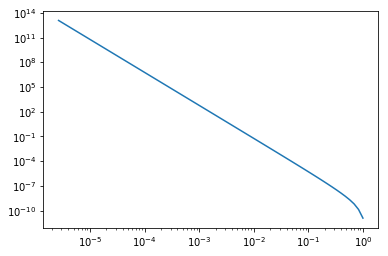

In [8]:
y=abs(np.array(out1)-np.array(out2))
plt.loglog(delta,y)
plt.show()

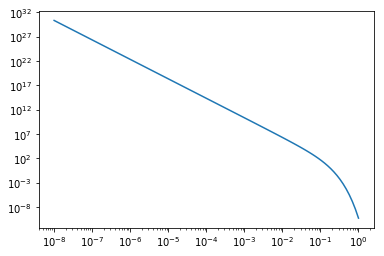

In [9]:
y=abs(np.array(out1))

plt.loglog(delta,y)
plt.show()

## Series Convergance

In [10]:
e1=-0.0003
delta=0.0003
e2=e1-delta
e3=e2-20*delta
terms=[]
ks=[]

if abs(e1)<1.0:
    if abs(e2) >= abs(e1) and abs(e2)>= abs(e3):
        e1, e2, e3 = e2, e1, e3
    elif abs(e3) >= abs(e1) and abs(e3) >= abs(e2):
        e1, e2, e3 = e3, e2, e1
    else:
        print('same')
        
for k in range(0,80):
    ks.append(k)
    prod=-np.exp(N*e1)*(-e1)**(-k-4)
    summ=0.0
    for m in range(0,k+2+1):
        summ=summ+(-N*e1)**m *(k-m+3)/fact[m]
    prod=prod*summ
    summ=0.0
    for m in range(0,k+1):
        summ=summ+(e2-e1)**(k-m) * (e3-e1)**m
    terms.append(abs(prod*summ))

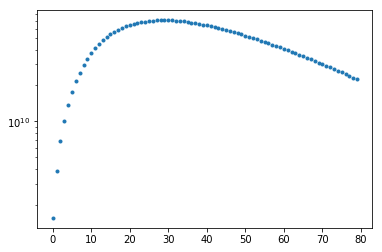

In [11]:
plt.semilogy(ks,terms,'.')
plt.show()

## Test f2

In [12]:
npts=1000
N=10
e2=0.001
j=2
e1s=np.logspace(-7,1,npts)
out=[]
for ii in range(0,npts):
    out.append(abs(f2(j,e1s[ii],2*e1s[ii],N)))
    

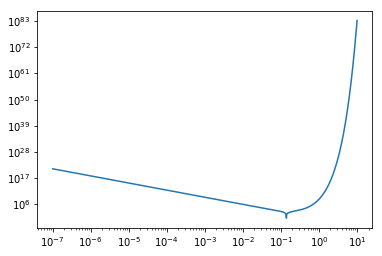

In [13]:
plt.loglog(e1s,out)
plt.show()

## Between rock and hard place

In [14]:
def f3nearZero(j,e1,e2,e3,N):
    return ((np.exp(N*e3)/(e3**j)) + e2*e1*f2(j+1,e1,e2,N) - e3*f2(j,e1,e2,N))/\
            ((e2-e3)*(e3-e1))

In [15]:
e1=-0.23
e2=-0.10
npts=200
N=10
j=2
delta=np.logspace(-10,-3,npts)
f2based=[]
series=[]
origional=[]
for ii in range(0,npts):
    e1=-0.1
    e2=-0.001
    e3=e2-delta[ii]
    f2based.append(abs(f3nearZero(j,e1,e2,e3,N)))
    series.append(abs(f3ver2(j,e1,e2,e3,N)))
    origional.append(abs(f3ver1(j,e1,e2,e3,N)))
    
f2based=np.array(f2based)
series=np.array(series)
origional=np.array(origional)

e1 -0.1 e2 -0.001 e3 -0.0010000001
k 60
e1 -0.1 e2 -0.001 e3 -0.001000000108436597
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000001175849555
k 60
e1 -0.1 e2 -0.001 e3 -0.001000000127505124
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000001382622175
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000001499268433
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000001625755667
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000001762914118
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000001911644075
k 60
e1 -0.1 e2 -0.001 e3 -0.001000000207292178
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000002247805833
k 60
e1 -0.1 e2 -0.001 e3 -0.001000000243744415
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000002643081487
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000002866067618
k 60
e1 -0.1 e2 -0.001 e3 -0.001000000310786619
k 60
e1 -0.1 e2 -0.001 e3 -0.001000000337006433
k 60
e1 -0.1 e2 -0.001 e3 -0.001000000365438307
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000003962688639
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000004297004705
k 60
e1 -0.1 e2 -0.001 e3 -0.001000000465952567
k 60
e1 -0.1 e2 -0.001 e3 -0.0010000005052

k 60
e1 -0.1 e2 -0.001 e3 -0.002
k 60


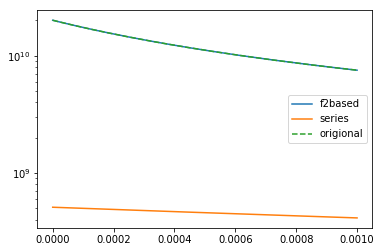

In [16]:
plt.semilogy(abs(delta),f2based,label='f2based')
plt.semilogy(abs(delta),series,label='series')
plt.semilogy(abs(delta),origional,'--',label='origional')
plt.legend()
plt.show()

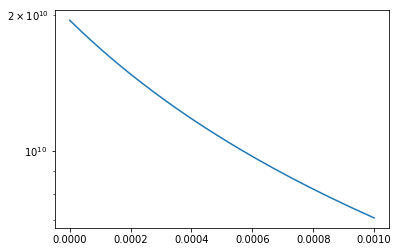

In [17]:
plt.semilogy(abs(delta),abs(f2based-series),label='f2based')
plt.show()

In [18]:
e1=-0.10001
e2=-0.010002
e3=-0.02
N=0.0001
j=1
print('f2based  ',f3nearZero(j,e1,e3,e2,N))
print('series   ',f3ver2(j,e1,e2,e3,N))
print('origional',f3ver1(j,e1,e2,e3,N))
print('f3',f3(j,e1,e2,e3,N))

f2based   49985.00349925015
e1 -0.10001 e2 -0.010002 e3 -0.02
k 60
series    49839.609553459304
origional 49985.00349925017
f3 49985.00349925016


In [19]:
e1=-0.01
e2=-10.1
e3=-10.2
N=10
j=1
print('f2based  ',f3nearZero(j,e1,e2,e3,N))
print('series   ',f3ver2(j,e1,e2,e3,N))
print('origional',f3ver1(j,e1,e2,e3,N))
print('f3',f3(j,e1,e2,e3,N))

f2based   0.8800456519741986
e1 -10.2 e2 -10.1 e3 -0.01
k 60
series    2.891217392017549e-08
origional 0.8800456519741969
f3 0.8800456519741969
